<a href="https://colab.research.google.com/github/Vishnunatraj/vishnu-N/blob/main/MULTINOMIAL_AND_BERNOULLI_NAIVE_BAYES_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
data = {
    'text': [
        "Win a brand new iPhone today, claim now!",
        "Your parcel will arrive tomorrow",
        "Get 70% discount on electronics, offer ending soon",
        "Mom, I reached home safely",
        "You have won ₹50,000 cash prize!",
        "Meeting postponed to 3 PM today",
        "Update your bank KYC immediately",
        "Let's go for dinner tonight",
        "Congratulations! You are a lucky winner today",
        "Can we talk later? I am in a meeting"
    ],
    'label': [
        'spam','ham','spam','ham','spam',
        'ham','spam','ham','spam','ham'
    ]
}

df = pd.DataFrame(data)
df  # SHOW DATASET


,text,label
0,"Win a brand new iPhone today, claim now!",spam
1,Your parcel will arrive tomorrow,ham
2,"Get 70% discount on electronics, offer ending ...",spam
3,"Mom, I reached home safely",ham
4,"You have won ₹50,000 cash prize!",spam
5,Meeting postponed to 3 PM today,ham
6,Update your bank KYC immediately,spam
7,Let's go for dinner tonight,ham
8,Congratulations! You are a lucky winner today,spam
9,Can we talk later? I am in a meeting,ham


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42
)


In [6]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [7]:
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)
y_pred_mnb = mnb.predict(X_test_counts)

bnb = BernoulliNB()
bnb.fit(X_train_counts, y_train)
y_pred_bnb = bnb.predict(X_test_counts)


In [8]:
print("Multinomial NB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli NB Accuracy:", accuracy_score(y_test, y_pred_bnb))


Multinomial NB Accuracy: 0.6666666666666666
Bernoulli NB Accuracy: 0.3333333333333333


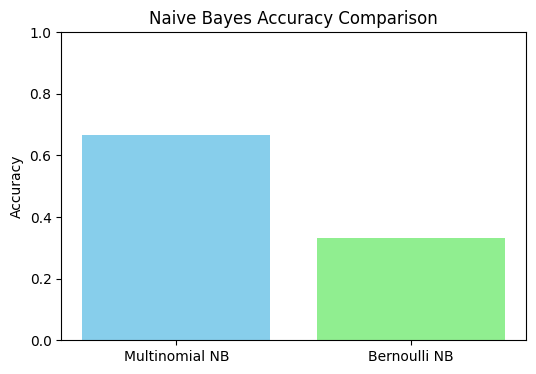

In [9]:
plt.figure(figsize=(6,4))
plt.bar(['Multinomial NB','Bernoulli NB'],
        [accuracy_score(y_test, y_pred_mnb), accuracy_score(y_test, y_pred_bnb)],
        color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy Comparison")
plt.show()


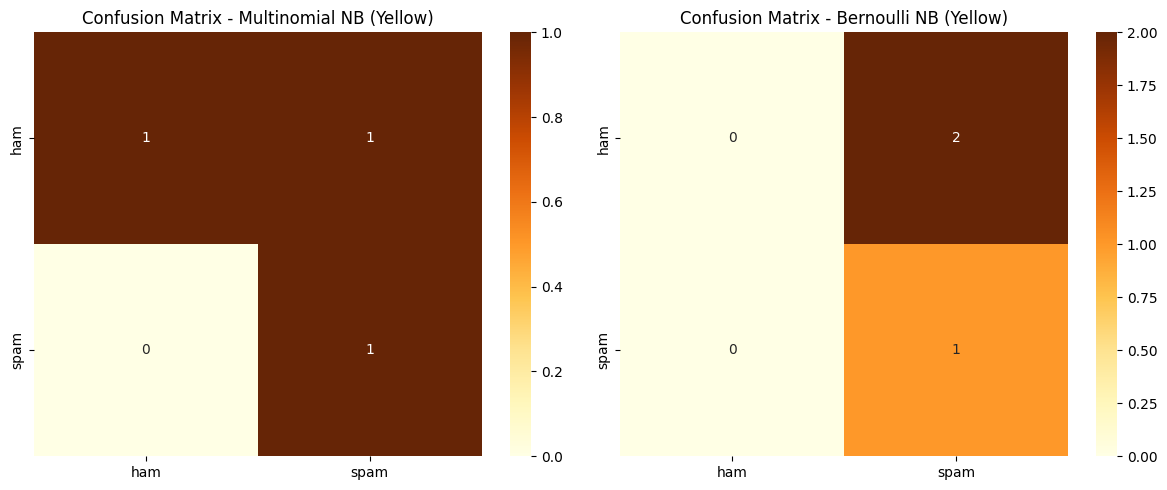

In [17]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb, labels=['ham','spam'])
cm_bnb = confusion_matrix(y_test, y_pred_bnb, labels=['ham','spam'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.title("Confusion Matrix - Multinomial NB (Yellow)")

plt.subplot(1,2,2)
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.title("Confusion Matrix - Bernoulli NB (Yellow)")

plt.tight_layout()
plt.show()


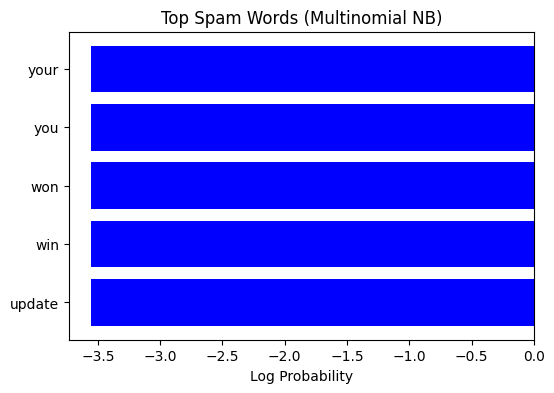

In [12]:
feature_names = vectorizer.get_feature_names_out()
spam_idx = list(mnb.classes_).index('spam')

spam_log_probs = mnb.feature_log_prob_[spam_idx]
topn = 5
top_indices = np.argsort(spam_log_probs)[-topn:]

top_words = feature_names[top_indices]
top_vals = spam_log_probs[top_indices]

plt.figure(figsize=(6,4))
plt.barh(top_words, top_vals, color='blue')
plt.xlabel("Log Probability")
plt.title("Top Spam Words (Multinomial NB)")
plt.show()
